<a href="https://colab.research.google.com/github/Aaditya97735/Data-Analysis-Projects/blob/main/IPL_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install pyyaml

from google.colab import files
uploaded = files.upload()

import zipfile
import os

# Unzip the uploaded file
zip_path = list(uploaded.keys())[0]
extract_path = "/content/ipl_yaml_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 📌 Step 3: Read and Load YAML Files
import yaml
import pandas as pd

all_matches = []

# Loop through all YAML files
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith(".yaml") or file.endswith(".yml"):
            with open(os.path.join(root, file), 'r') as stream:
                try:
                    data = yaml.safe_load(stream)
                    all_matches.append(data)
                except yaml.YAMLError as exc:
                    print(f"Error in {file}: {exc}")

# 📌 Step 4: Convert to DataFrame (Delivery-level Analysis)
deliveries_data = []

for match in all_matches:
    match_info = match.get('info', {})
    innings = match.get('innings', [])

    for inning in innings:
        for inning_name, inning_data in inning.items():
            team = inning_data.get('team', '')
            deliveries = inning_data.get('deliveries', [])
            for delivery in deliveries:
                for ball_no, ball_data in delivery.items():
                    record = {
                        'match_date': match_info.get('dates', [''])[0],
                        'venue': match_info.get('venue', ''),
                        'team': team,
                        'ball': ball_no,
                        'batsman': ball_data.get('batsman', ''),
                        'bowler': ball_data.get('bowler', ''),
                        'non_striker': ball_data.get('non_striker', ''),
                        'runs_batsman': ball_data.get('runs', {}).get('batsman', 0),
                        'runs_total': ball_data.get('runs', {}).get('total', 0),
                        'wicket': 'wicket' in ball_data
                    }
                    deliveries_data.append(record)

df = pd.DataFrame(deliveries_data)
df.head()


Saving ipl_male.zip to ipl_male (1).zip


,match_date,venue,team,ball,batsman,bowler,non_striker,runs_batsman,runs_total,wicket
0,2011-04-11,Eden Gardens,Kolkata Knight Riders,0.1,JH Kallis,DW Steyn,MS Bisla,4,4,False
1,2011-04-11,Eden Gardens,Kolkata Knight Riders,0.2,JH Kallis,DW Steyn,MS Bisla,0,0,False
2,2011-04-11,Eden Gardens,Kolkata Knight Riders,0.3,JH Kallis,DW Steyn,MS Bisla,4,4,False
3,2011-04-11,Eden Gardens,Kolkata Knight Riders,0.4,JH Kallis,DW Steyn,MS Bisla,0,0,False
4,2011-04-11,Eden Gardens,Kolkata Knight Riders,0.5,JH Kallis,DW Steyn,MS Bisla,0,0,False


from matplotlib import pyplot as plt
_df_15['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['ball'].plot(kind='hist', bins=20, title='ball')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['runs_batsman'].plot(kind='hist', bins=20, title='runs_batsman')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['runs_total'].plot(kind='hist', bins=20, title='runs_total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='index', y='ball', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='ball', y='runs_batsman', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='runs_batsman', y='runs_total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['runs_batsman']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('runs_batsman')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['runs_total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('runs_total')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['match_date']
  ys = series['runs_batsman']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('match_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('match_date')
_ = plt.ylabel('runs_batsman')

from matplotlib import pyplot as plt
_df_26['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['ball'].plot(kind='line', figsize=(8, 4), title='ball')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['runs_batsman'].plot(kind='line', figsize=(8, 4), title='runs_batsman')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['runs_total'].plot(kind='line', figsize=(8, 4), title='runs_total')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
df.describe(include='all')


Shape of dataset: (278205, 10)

Columns: ['match_date', 'venue', 'team', 'ball', 'batsman', 'bowler', 'non_striker', 'runs_batsman', 'runs_total', 'wicket']

Missing values:
 match_date      0
venue           0
team            0
ball            0
batsman         0
bowler          0
non_striker     0
runs_batsman    0
runs_total      0
wicket          0
dtype: int64


,match_date,venue,team,ball,batsman,bowler,non_striker,runs_batsman,runs_total,wicket
count,278205,278205,278205,278205.000000,278205,278205,278205,278205.000000,278205.00000,278205
unique,891,59,19,NaN,704,551,693,NaN,NaN,2
top,2020-10-18,Eden Gardens,Mumbai Indians,NaN,V Kohli,R Ashwin,V Kohli,NaN,NaN,False
freq,520,17988,33323,NaN,6702,4868,6671,NaN,NaN,264382
mean,NaN,NaN,NaN,9.556351,NaN,NaN,NaN,1.277378,1.34535,NaN
std,NaN,NaN,NaN,5.684273,NaN,NaN,NaN,1.651107,1.63762,NaN
min,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,0.000000,0.00000,NaN
25%,NaN,NaN,NaN,4.500000,NaN,NaN,NaN,0.000000,0.00000,NaN
50%,NaN,NaN,NaN,9.400000,NaN,NaN,NaN,1.000000,1.00000,NaN
75%,NaN,NaN,NaN,14.400000,NaN,NaN,NaN,1.000000,1.00000,NaN


In [14]:
import matplotlib.pyplot as plt


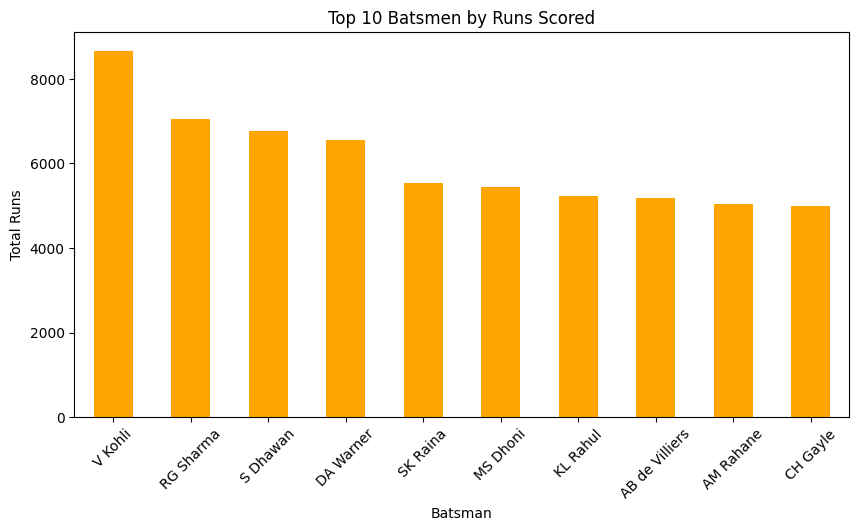

In [15]:
top_batsmen = df.groupby('batsman')['runs_batsman'].sum().sort_values(ascending=False).head(10)
top_batsmen.plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Top 10 Batsmen by Runs Scored')
plt.ylabel('Total Runs')
plt.xlabel('Batsman')
plt.xticks(rotation=45)
plt.show()


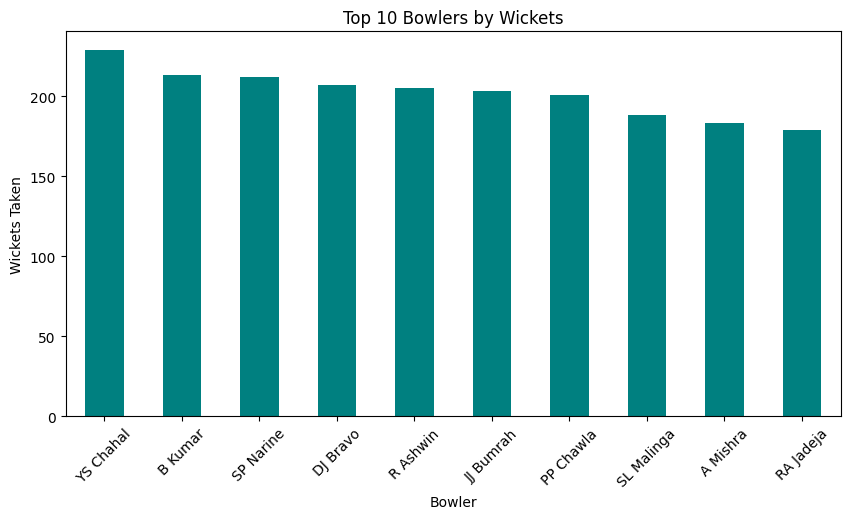

In [16]:
wickets = df[df['wicket'] == True]
top_bowlers = wickets['bowler'].value_counts().head(10)
top_bowlers.plot(kind='bar', figsize=(10,5), color='teal')
plt.title('Top 10 Bowlers by Wickets')
plt.ylabel('Wickets Taken')
plt.xlabel('Bowler')
plt.xticks(rotation=45)
plt.show()


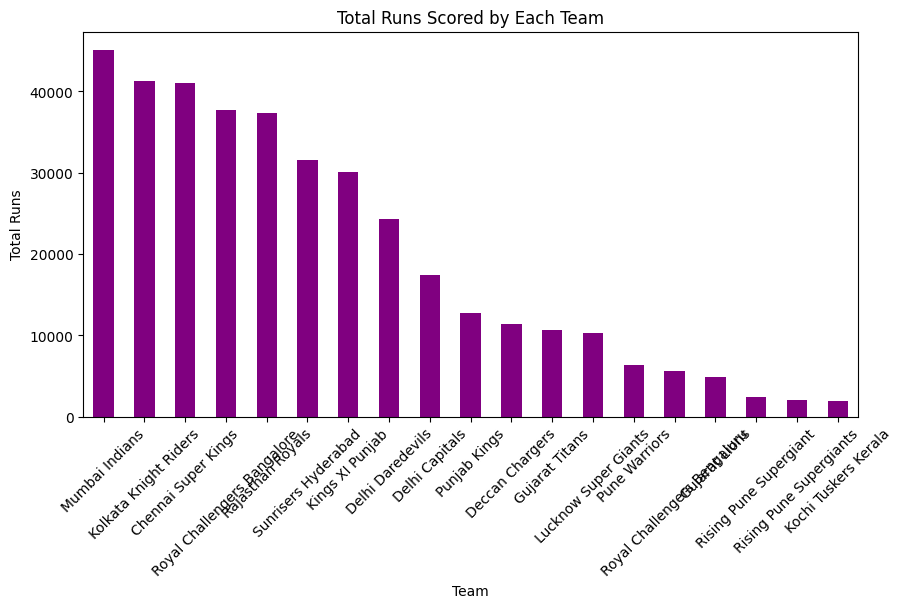

In [17]:
team_runs = df.groupby('team')['runs_total'].sum().sort_values(ascending=False)
team_runs.plot(kind='bar', figsize=(10,5), color='purple')
plt.title('Total Runs Scored by Each Team')
plt.ylabel('Total Runs')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.show()


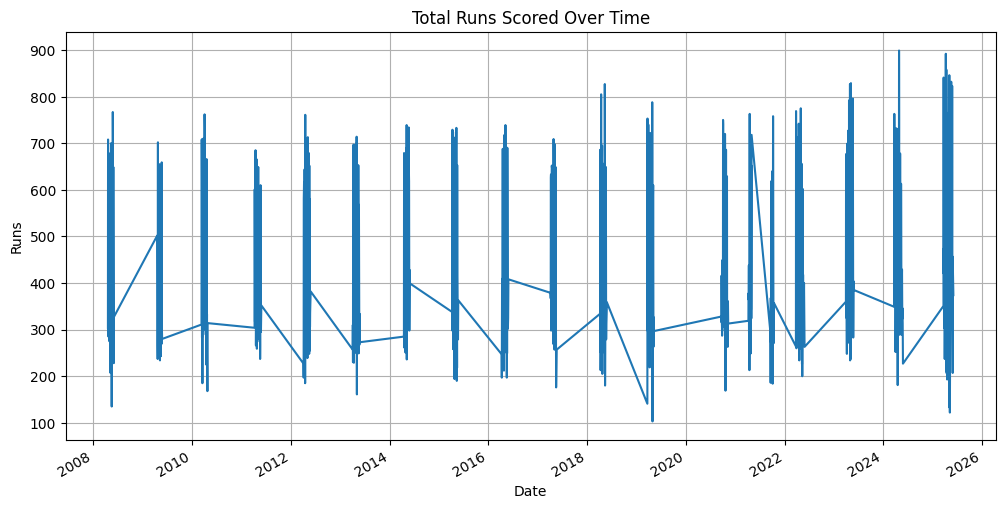

In [18]:
df['match_date'] = pd.to_datetime(df['match_date'])
runs_by_date = df.groupby('match_date')['runs_total'].sum()
runs_by_date.plot(figsize=(12,6))
plt.title('Total Runs Scored Over Time')
plt.ylabel('Runs')
plt.xlabel('Date')
plt.grid(True)
plt.show()


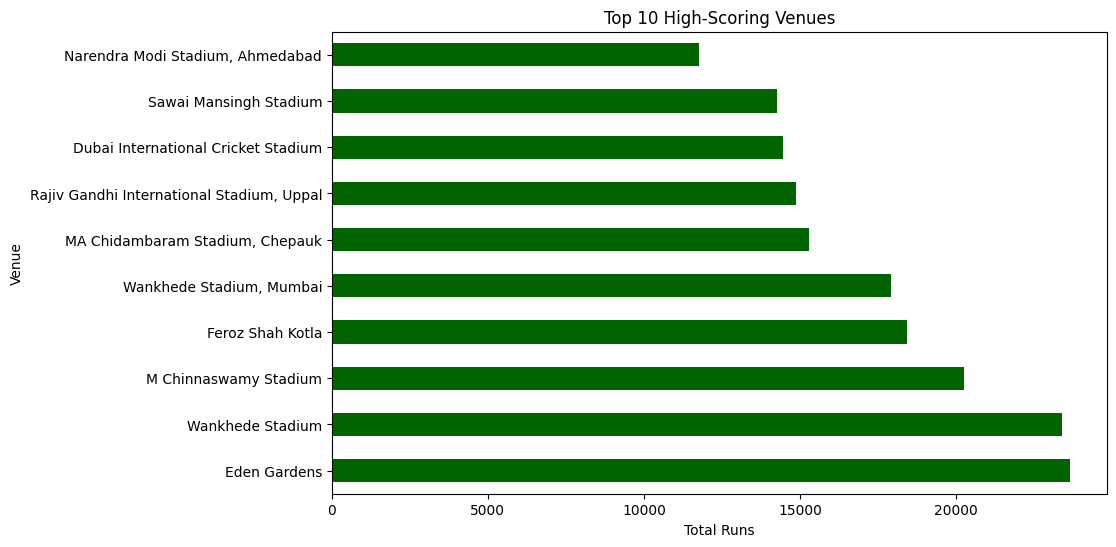

In [19]:
venue_runs = df.groupby('venue')['runs_total'].sum().sort_values(ascending=False).head(10)
venue_runs.plot(kind='barh', figsize=(10,6), color='darkgreen')
plt.title('Top 10 High-Scoring Venues')
plt.xlabel('Total Runs')
plt.ylabel('Venue')
plt.show()


In [13]:
df.to_csv("ipl_ball_by_ball_data.csv", index=False)
